In [1]:
#%pip install streamlink
#%pip install ffmpeg

In [2]:
import streamlink
import cv2
from matplotlib import pyplot as plt

streams = streamlink.streams("https://www.twitch.tv/sorkarenzu")
stream_url = streams["best"].url

streams.keys()

dict_keys(['audio_only', '720p60', 'worst', 'best'])

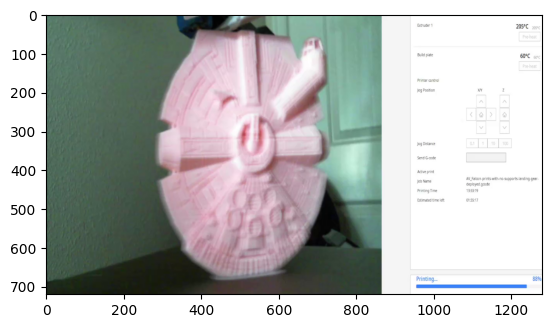

In [3]:
vcap = cv2.VideoCapture(stream_url)
image = vcap.read()[1]
cv2.imwrite('output_image.jpg', image)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Average FPS: 0.401


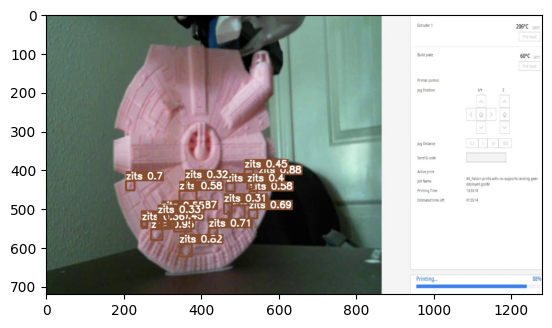

In [4]:
import os
import subprocess

vcap = cv2.VideoCapture(stream_url)
image = vcap.read()[1]
cv2.imwrite('output_image.jpg', image)

subprocess.run(['python3', 'ObjectDetection-FasterRCNN-master/inference.py','--input','./output_image.jpg','--weights','./best_model.pth'])

foo = len(os.listdir('outputs/inference'))
#'./outputs/inference/res_{foo}/output_image.jpg'
image = cv2.imread(f'./outputs/inference/res_{foo}/output_image.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()